In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:


AAPL = pd.read_csv('Filtered_Data/AAPL_filtered.csv', index_col='Local Date')
AMZN = pd.read_csv('Filtered_Data/AMZN_filtered.csv', index_col='Local Date')
ARCA_TECH = pd.read_csv('Filtered_Data/ARCA_TECH_filtered.csv', index_col='Local Date')
BIT_USD = pd.read_csv('Filtered_Data/BIT_USD_filtered.csv', index_col='Local Date')
GOOGL = pd.read_csv('Filtered_Data/GOOGL_filtered.csv', index_col='Local Date')
MSFT = pd.read_csv('Filtered_Data/MSFT_filtered.csv', index_col='Local Date')
NASDAQ = pd.read_csv('Filtered_Data/NASDAQ_filtered.csv', index_col='Local Date')
OIL = pd.read_csv('Filtered_Data/OIL_filtered.csv', index_col='Local Date')
TSLA = pd.read_csv('Filtered_Data/TSLA_filtered.csv', index_col='Local Date')
NVDA = pd.read_csv('Filtered_Data/NVDA_filtered.csv', index_col='Local Date')
META = pd.read_csv('Filtered_Data/META_filtered.csv', index_col='Local Date')
NFLX = pd.read_csv('Filtered_Data/NFLX_filtered.csv', index_col='Local Date')
CMCSA = pd.read_csv('Filtered_Data/CMCSA_filtered.csv', index_col='Local Date')
TMUS = pd.read_csv('Filtered_Data/TMUS_filtered.csv', index_col='Local Date')
QCOM = pd.read_csv('Filtered_Data/QCOM_filtered.csv', index_col='Local Date')
TXN = pd.read_csv('Filtered_Data/TXN_filtered.csv', index_col='Local Date')
ADBE = pd.read_csv('Filtered_Data/ADBE_filtered.csv', index_col='Local Date')
COST = pd.read_csv('Filtered_Data/COST_filtered.csv', index_col='Local Date')
AMAT = pd.read_csv('Filtered_Data/AMAT_filtered.csv', index_col='Local Date')
PEP = pd.read_csv('Filtered_Data/PEP_filtered.csv', index_col='Local Date')
HON =  pd.read_csv('Filtered_Data/HON_filtered.csv', index_col='Local Date')


AAPL = AAPL[['AAPL_Log_Change','AAPL_High_Low_Spread','AAPL_Volume','AAPL_1hr_Moving_Average','AAPL_RSI']]
AMZN = AMZN[['AMZN_Log_Change','AMZN_High_Low_Spread','AMZN_Volume','AMZN_1hr_Moving_Average','AMZN_RSI']]
ARCA_TECH = ARCA_TECH[['ARCA_TECH_Log_Change','ARCA_TECH_1hr_Moving_Average']]
BIT_USD = BIT_USD[['BTC_Log_Change','BTC_Bid_ask_spread']]
GOOGLE = GOOGL[['GOOGL_Log_Change','GOOGL_High_Low_Spread','GOOGL_Volume','GOOGL_1hr_Moving_Average','GOOGL_RSI']]
MSFT = MSFT[['MSFT_Log_Change','MSFT_High_Low_Spread','MSFT_Volume','MSFT_1hr_Moving_Average','MSFT_RSI']]
NASDAQ = NASDAQ[['NASDAQ_Log_Change','NASDAQ_1hr_Moving_Average']]
OIL = OIL[['OIL_Log_Change','OIL_Volume','OIL_High_Low_Spread']]
TSLA = TSLA[['TSLA_Log_Change','TSLA_High_Low_Spread','TSLA_Volume','TSLA_1hr_Moving_Average','TSLA_RSI']]
NVDA = NVDA[['NVDA_Log_Change','NVDA_High_Low_Spread','NVDA_Volume','NVDA_1hr_Moving_Average','NVDA_RSI']]
META = META[['META_Log_Change','META_High_Low_Spread','META_Volume','META_1hr_Moving_Average','META_RSI']]
NFLX = NFLX[['NFLX_Log_Change','NFLX_High_Low_Spread','NFLX_Volume','NFLX_1hr_Moving_Average','NFLX_RSI']]
CMCSA = CMCSA[['CMCSA_Log_Change','CMCSA_High_Low_Spread','CMCSA_Volume','CMCSA_1hr_Moving_Average','CMCSA_RSI']]
TMUS = TMUS[['TMUS_Log_Change','TMUS_High_Low_Spread','TMUS_Volume','TMUS_1hr_Moving_Average','TMUS_RSI']]
QCOM = QCOM[['QCOM_Log_Change','QCOM_High_Low_Spread','QCOM_Volume','QCOM_1hr_Moving_Average','QCOM_RSI']]
TXN = TXN[['TXN_Log_Change','TXN_High_Low_Spread','TXN_Volume','TXN_1hr_Moving_Average','TXN_RSI']]
ADBE = ADBE[['ADBE_Log_Change','ADBE_High_Low_Spread','ADBE_Volume','ADBE_1hr_Moving_Average','ADBE_RSI']]
COST = COST[['COST_Log_Change','COST_High_Low_Spread','COST_Volume','COST_1hr_Moving_Average','COST_RSI']]
AMAT = AMAT[['AMAT_Log_Change','AMAT_High_Low_Spread','AMAT_Volume','AMAT_1hr_Moving_Average','AMAT_RSI']]
PEP = PEP[['PEP_Log_Change','PEP_High_Low_Spread','PEP_Volume','PEP_1hr_Moving_Average','PEP_RSI']]
HON = HON[['HON_Log_Change','HON_High_Low_Spread','HON_Volume','HON_1hr_Moving_Average','HON_RSI']]


combined_dataset = AAPL.join([AMZN, ARCA_TECH, BIT_USD, GOOGL, MSFT, NASDAQ, OIL, TSLA, NVDA, META, NFLX, CMCSA, TMUS, QCOM, TXN, ADBE, COST, AMAT, PEP, HON], how='left')
combined_dataset = combined_dataset.drop(columns = ['Local Time', 'Close', 'Net', 	'%Chg', 'Open', 'Low', 'High', 'Volume'])
na_row_indices = combined_dataset[combined_dataset.isna().any(axis=1)].index

index_list = na_row_indices.tolist()




In [60]:
#Fill in missing values
combined_dataset = combined_dataset[19:-1]
combined_dataset.shape
combined_dataset.to_csv('combined_dataset.csv')

In [61]:
import pandas as pd
import numpy as np

def fill_with_closest_average(df):
    for column in df.columns:
        for i in df[df[column].isna()].index:
            idx_position = df.index.get_loc(i)

            next_valid_index = df[column].iloc[idx_position:].dropna().first_valid_index()
            prev_valid_index = df[column].iloc[:idx_position].dropna().last_valid_index()

            next_valid = df.at[next_valid_index, column] if next_valid_index is not None else np.nan
            prev_valid = df.at[prev_valid_index, column] if prev_valid_index is not None else np.nan

            if not pd.isna(next_valid) and not pd.isna(prev_valid):
                df.at[i, column] = (next_valid + prev_valid) / 2
            elif not pd.isna(next_valid):
                df.at[i, column] = next_valid
            elif not pd.isna(prev_valid):
                df.at[i, column] = prev_valid

    return df

combined_dataset_filled = fill_with_closest_average(combined_dataset)

print(combined_dataset_filled)


                     AAPL_Log_Change  AAPL_High_Low_Spread  AAPL_Volume  \
Local Date                                                                
2023-11-08 14:25:00        -0.000230                 0.088     227644.0   
2023-11-08 14:20:00         0.000230                 0.130     277715.0   
2023-11-08 14:15:00        -0.000027                 0.080     231994.0   
2023-11-08 14:10:00         0.000082                 0.140     279311.0   
2023-11-08 14:05:00        -0.000612                 0.230     287958.0   
...                              ...                   ...          ...   
2022-11-21 09:55:00        -0.001078                 0.530    1055360.0   
2022-11-21 09:50:00         0.000209                 0.740    1204018.0   
2022-11-21 09:45:00        -0.003819                 0.600    1301872.0   
2022-11-21 09:40:00        -0.001083                 1.660    1580060.0   
2022-11-21 09:35:00         0.002559                 1.490    2588802.0   

                     AAP

Check for missing value

In [62]:
has_na = combined_dataset_filled.isna().any().any()

print(f"Does the DataFrame have any NaN values? {has_na}")


Does the DataFrame have any NaN values? False


Draw a correlation matrix. 

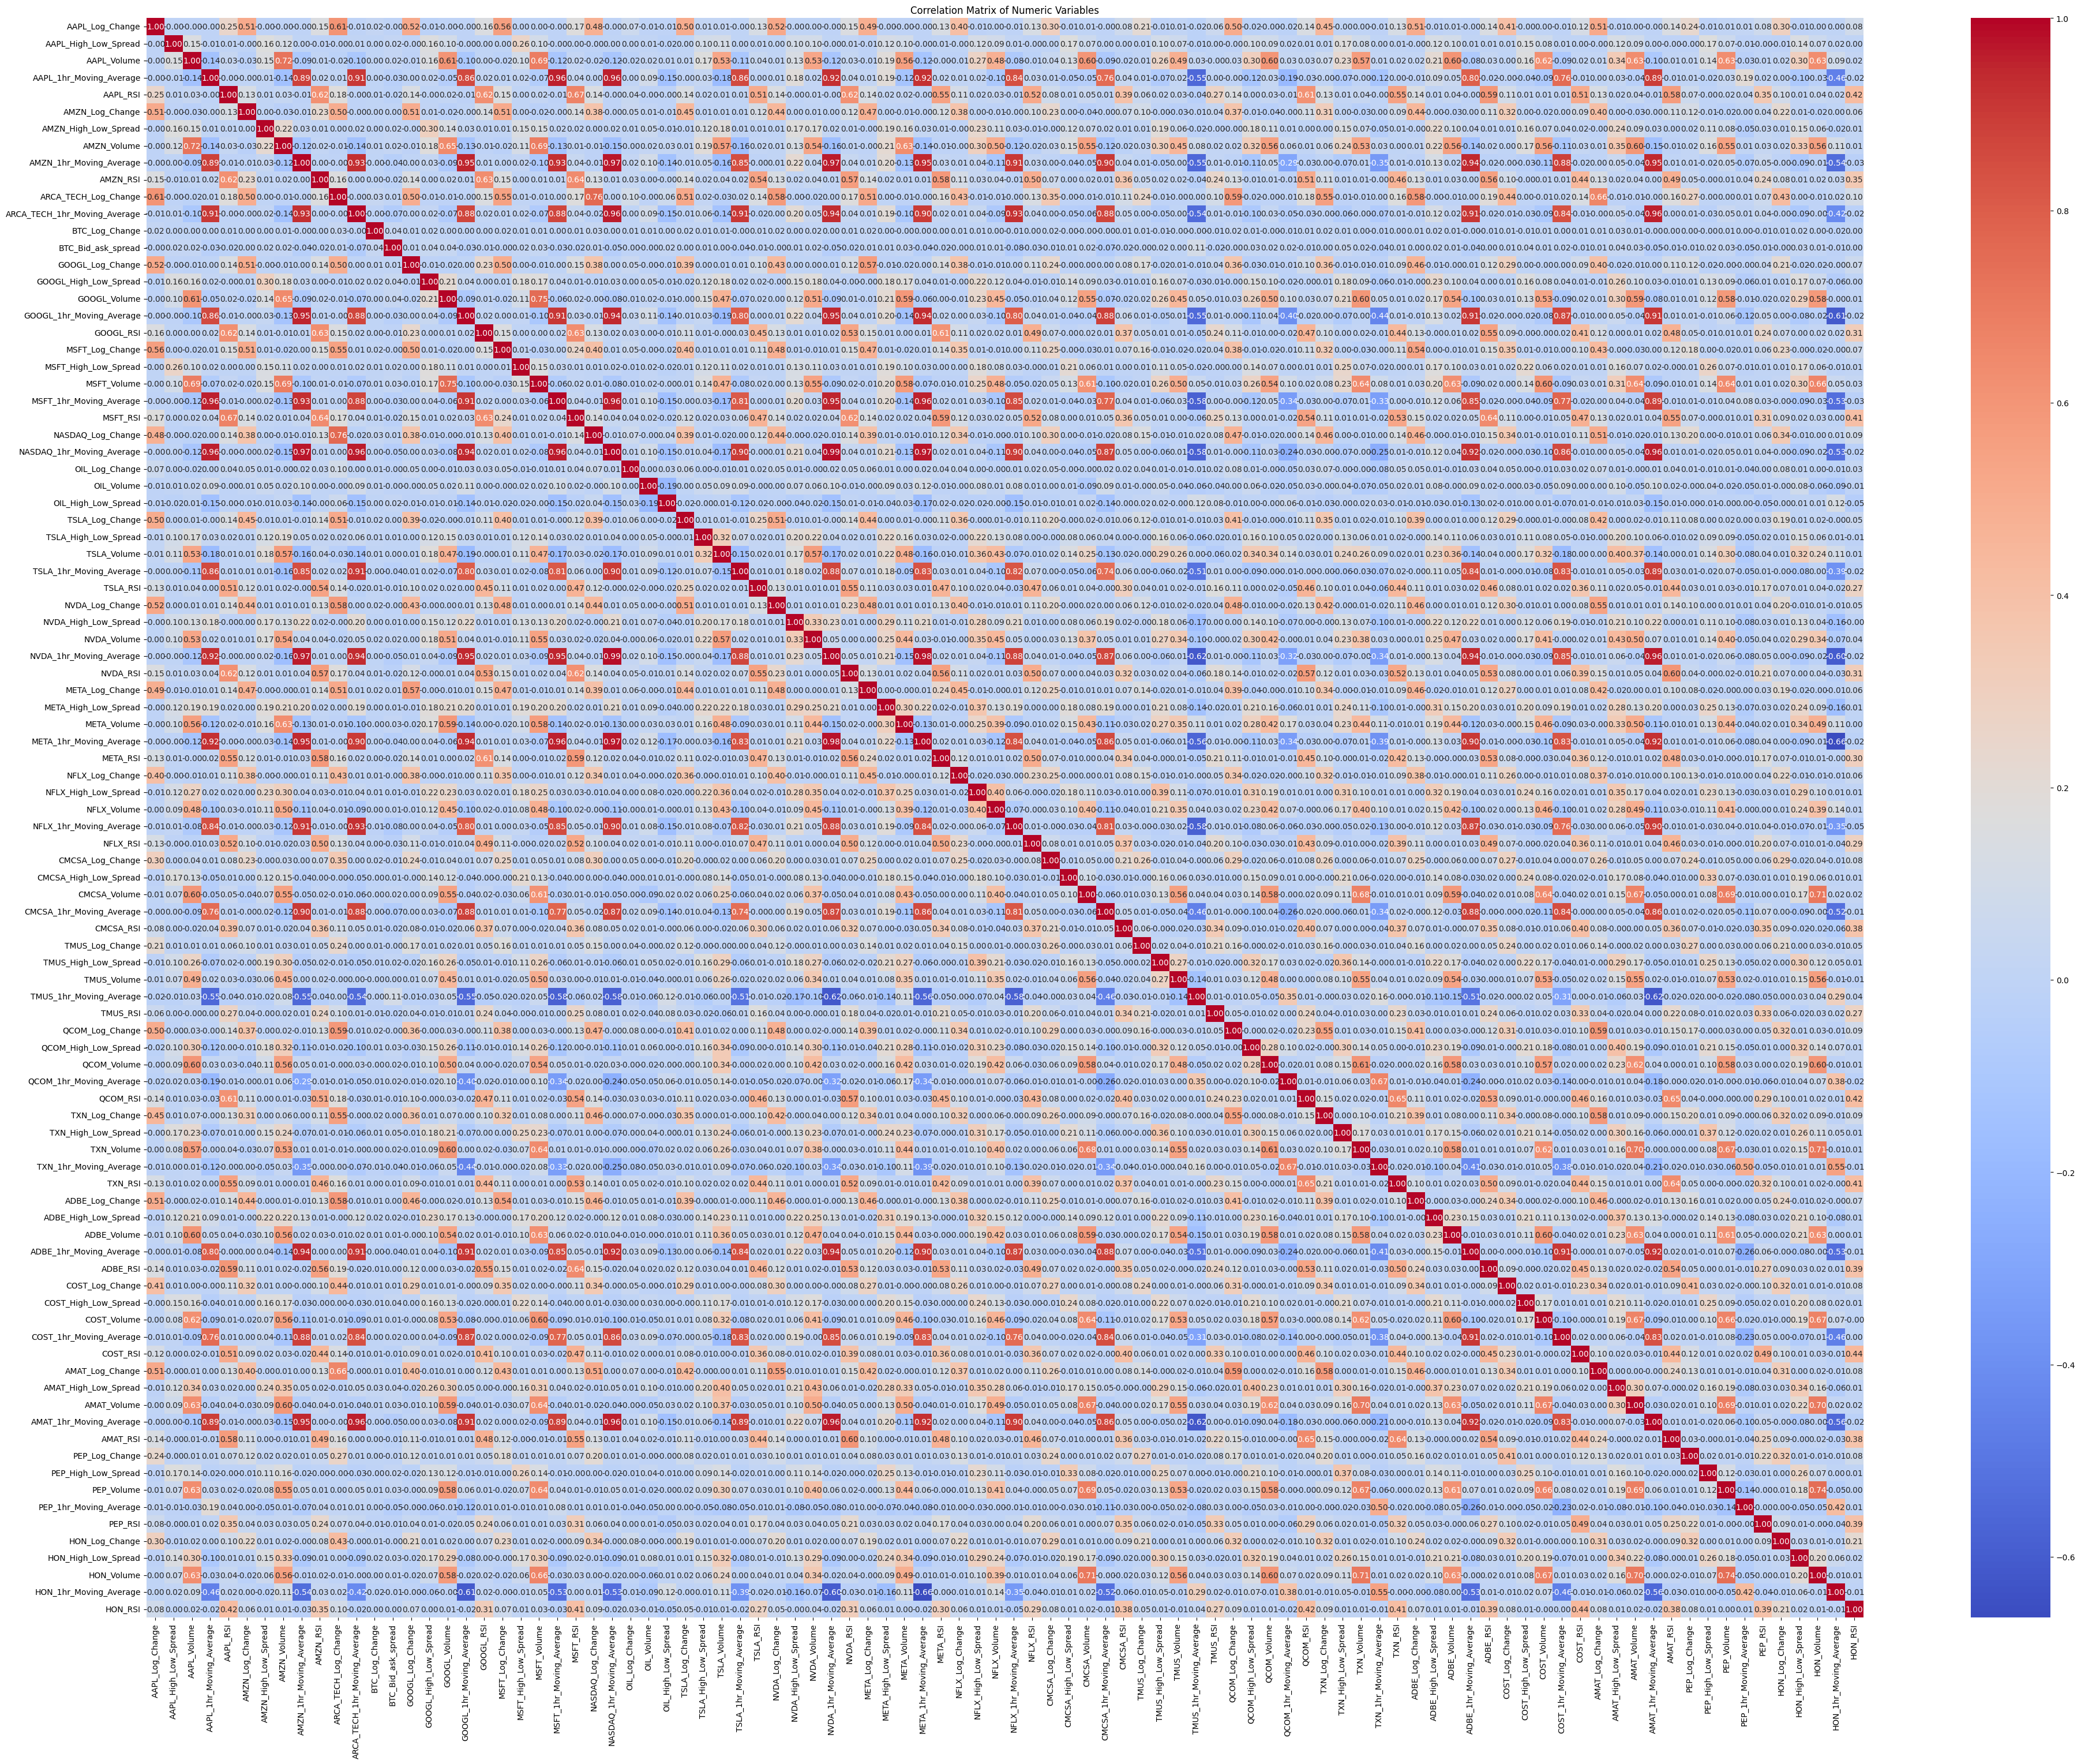

In [63]:
numeric_cols = combined_dataset_filled.select_dtypes(include=[np.number])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(48, 36))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Variables")
plt.show()
